## Prediksi Check-in Pada Reservasi Hotel Secara Online
Maraknya sistem berbasis online juga merujuk pada hotel, sehingga saat ini banyak hotel yang ikut menerapkan hal tersebut untuk melakukan reservasi secara online. Akan tetapi, tidak semua pelanggan melakukan check-in pada hari-h sesuai yang direservasikan. Hal ini tentunya akan menyumbat keuntungan hotel, jika pada saat yang sama, pelanggan yang melakukan reservasi sudah penuh, namun terdapat pelanggan baru yang hendak check-in. Oleh karenanya, dibutuhkan sebuah model klasifikasi yang dapat memprediksi pelanggan mana yang kemungkinan akan melakukan check-in atau tidak. Setidaknya dengan hal ini, hotel dapat memilah dan melakukan berbagai keputusan yang lebih menguntungkan hotel.

Pada projek kali ini, saya menggunakan data yang diambil dari kaggle dengan link : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset. Fokus utama dari pengerjaan projek ini adalah sebagai pembelajaran dan pembuatan projek. Pada projek ini akan digunakan sistem pengembangan yang berbasis data-sentris. Data-sentris merupakan sistem pengembangan yang melakukan improvisasi pada data untuk meningkatkan akurasi model. Kendati demikian, dikarenakan data yang sedikit, perlu beberapa model untuk menentukan model mana yang paling cocok untuk kasus ini.

Ini adalah projek pertama yang saya kerjakan secara mandiri, dengan harapan untuk diteruskan dan terus melakukan perkembangan. Stay tuned

### Persiapan Awal
DIbutuhkan persiapan awal seperti import berbagai library/modul yang dibutuhkan dan penyiapan dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold, cross_validate

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [4]:
path = os.getcwd()
dataset_name = 'Hotel Reservations.csv'
datapath = os.path.join(path, 'data', dataset_name)

In [5]:
dataset = pd.read_csv(datapath)
dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Rename Kolom
Penamaan kembali kolom berfungsi untuk memudahkan kita dalam melakukan feature engineering nanti, dan melakukan plotting terhadap data. Dengan demikian, kita dapat memanfaatkan intrinsik insight yang terkandung di dalam data sebaik mungkin.

In [6]:
df = dataset.copy()

In [7]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [8]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [9]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [10]:
df['booking_status'] = df['booking_status'].replace(['Canceled', 'Not_Canceled'], [1, 0])

In [11]:
df['room_type_reserved'] = df['room_type_reserved'].replace(
    ['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3'],
    ['Tipe 1', 'Tipe 4', 'Tipe 2', 'Tipe 6', 'Tipe 5', 'Tipe 7', 'Tipe 3']
)

In [12]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(
    ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
    ['Plan 1', 'Plan 0', 'Plan 2', 'Plan 3']
)

In [13]:
df.drop(['Booking_ID'], axis = 1, inplace = True)

<AxesSubplot:xlabel='booking_status', ylabel='count'>

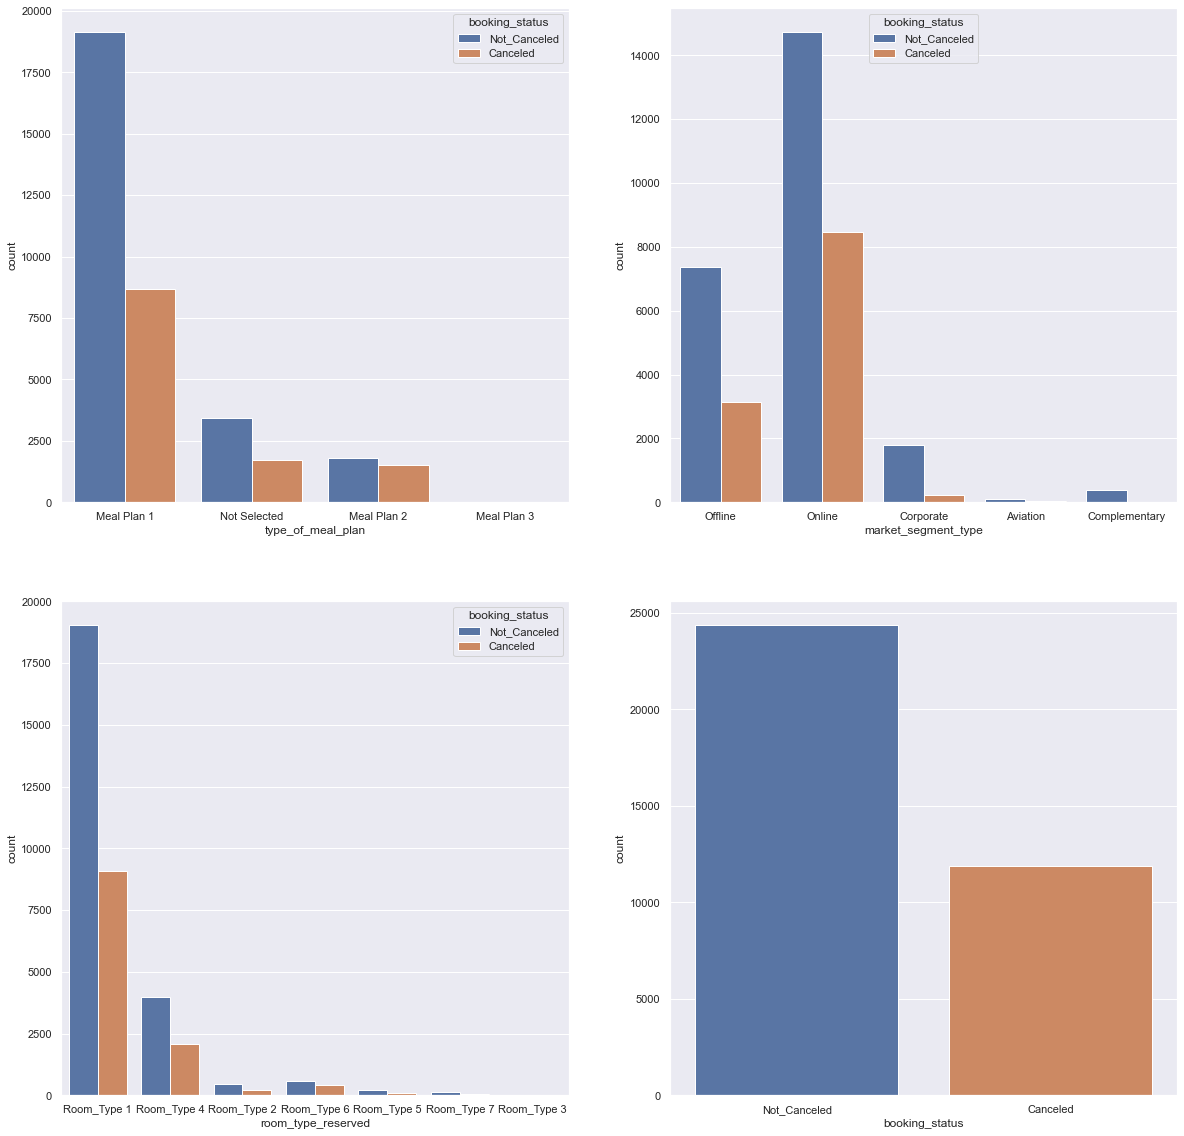

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20))

sns.countplot(data = dataset, x = 'type_of_meal_plan', hue = 'booking_status', ax = ax[0][0])
sns.countplot(data = dataset, x = 'room_type_reserved', hue = 'booking_status', ax = ax[1][0])
sns.countplot(data = dataset, x = 'market_segment_type', hue = 'booking_status', ax = ax[0][1])
sns.countplot(data = dataset, x = 'booking_status', ax = ax[1][1])

Seperti yang terlihat pada distribusi data tersebut, jelas bahwa dataset yang digunakan saat ini tidak seimbang (imbalance). Terdapat beberapa pendekatan yang dapat dilakukan untuk mengatasi dataset yang seperti ini.
1. Undersampling : Menghapus data not_canceled mengikuti banyak data canceled
2. Oversampling : Generating new data dari label canceled, sehingga sama banyak dengan not canceled.

### Feature Engineering
Feature Engineering merupakan proses manipulasi data seperti delete, add, concat, dsb. Hal ini berguna untuk memberi persepsi baru terhadap data dan agar model dapat mengekstraksi insight lebih maksimal. Terdapat beberapa hal yang akan saya lakukan:
1. Mengecek keberadaan outlier, dan menghapus baris tersebut jika terdapa outlier.

<AxesSubplot:xlabel='avg_price_per_room'>

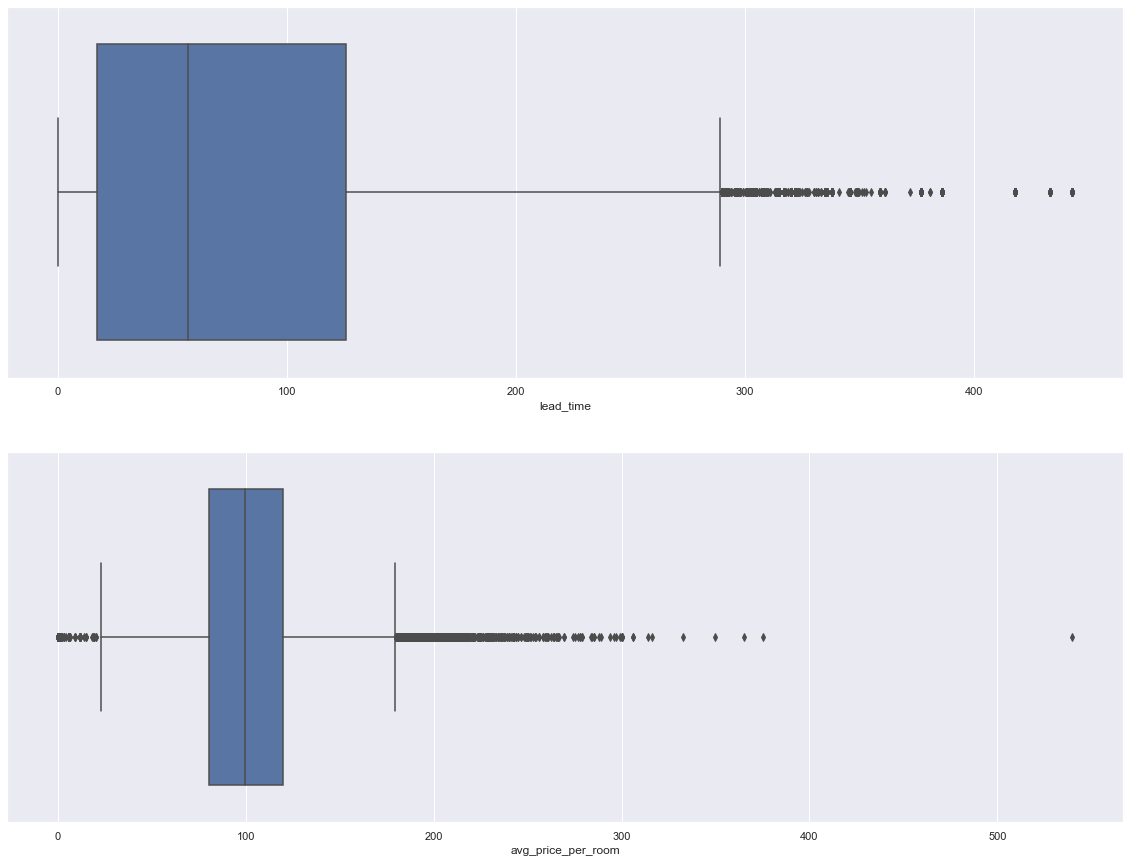

In [15]:
fig, ax = plt.subplots(2, 1, figsize = (20, 15))

sns.boxplot(data = df, x = 'lead_time', ax = ax[0])
sns.boxplot(data = df, x = 'avg_price_per_room', ax = ax[1], hue = 'market_segment_type')

<AxesSubplot:title={'center':'Average Price Room Over Market Segment'}, xlabel='market_segment_type', ylabel='avg_price_per_room'>

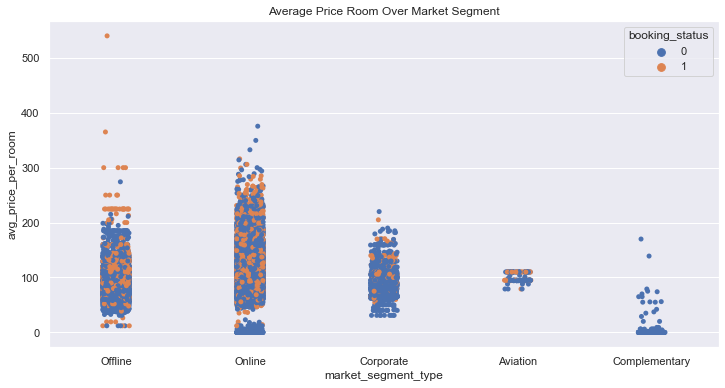

In [16]:
plt.figure(figsize = (12, 6))
plt.title('Average Price Room Over Market Segment')
sns.stripplot(data = df, y = 'avg_price_per_room', x = 'market_segment_type', hue = 'booking_status')

Berdasarkan grafik stripplot tersebut, dapat kita lihat terdapat satu pencilan yang abnormal pada type market offline, yang tentunya perlu kita drop karena dapat mengganggu keseimbangan data. Sebelumnya, perlu dicek terlebih dahulu informasi seluruh baris pada data tersebut.

In [17]:
abnormal_df = df[df['avg_price_per_room'] > 500]
abnormal_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33114,2,0,0,1,Plan 1,0,Tipe 1,35,2018,3,25,Offline,0,0,0,540.0,0,1


In [18]:
df = df.drop(abnormal_df.index)

In [19]:
df[df['avg_price_per_room'] > 500]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


Terlihat bahwa data abnormal telah didropout, dan diharapkan model dapat terlatih secara lebih baik

### Encoding dan Scaling Dataset
Pada proses encoding, saya akan menggunakan one hot encoder. One Hot Encoder merupakan salah satu tipe encoding yang digunakan untuk melakukan encoding pada data berjenis ordinal, yaitu data yang tidak memiliki peringkat value. Scaling juga diperlukan untuk menormalisasi nilai pada dataset agar tidak terjadi timpang data, kali ini saya menggunakan min max scaler.

In [20]:
X = df.drop('booking_status', axis = 1)
y = df['booking_status']

In [21]:
ord_col = ['type_of_meal_plan', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
num_col = X.drop(ord_col, axis = 1).columns

num_pipeline = Pipeline([
    ("Min-Max scaler", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("One-Hot", OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('Categorical', cat_pipeline, ord_col),
    ('Numerical', num_pipeline, num_col)
])
    
X_prepared = full_pipeline.fit_transform(X)

### Modelling
Pada tahap awal modeling akan digunakan pendekatan menggunakan model-sentris, yaitu pendekatan dengan mencari model yang paling efisien untuk digunakan terhadap konteks dan tujuan projek. Berdasarkan hasil tersebut kemudian, akan dilakukan pengembangan lebih lanjut. Saya akan menggunakan confusion matrix untuk menganalisis model dan memilih model mana yang akan digunakan.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, random_state = 1, test_size = 0.2)

In [23]:
clf_rfc = RandomForestClassifier()
clf_lr = LogisticRegression(random_state=42)
clf_sgd = SGDClassifier(random_state=42)
clf_knn = KNeighborsClassifier()
clf_cart = DecisionTreeClassifier(random_state=42)
clf_nb = MultinomialNB()
clf_svm = SVC(random_state=42)
clf_xgb = XGBClassifier()

model_clf = [clf_rfc, clf_lr, clf_sgd, clf_knn, clf_cart, clf_nb, clf_svm, clf_xgb]
model_name = [
    'RandomForestClassifier', 
    'LogisticRegression', 
    'SGDClassifier', 
    'KNeighborsClassifier', 
    'DecisionTreeClassifier',
    'MultinomialNB',
    'SVC',
    'XGBClassifier'
]

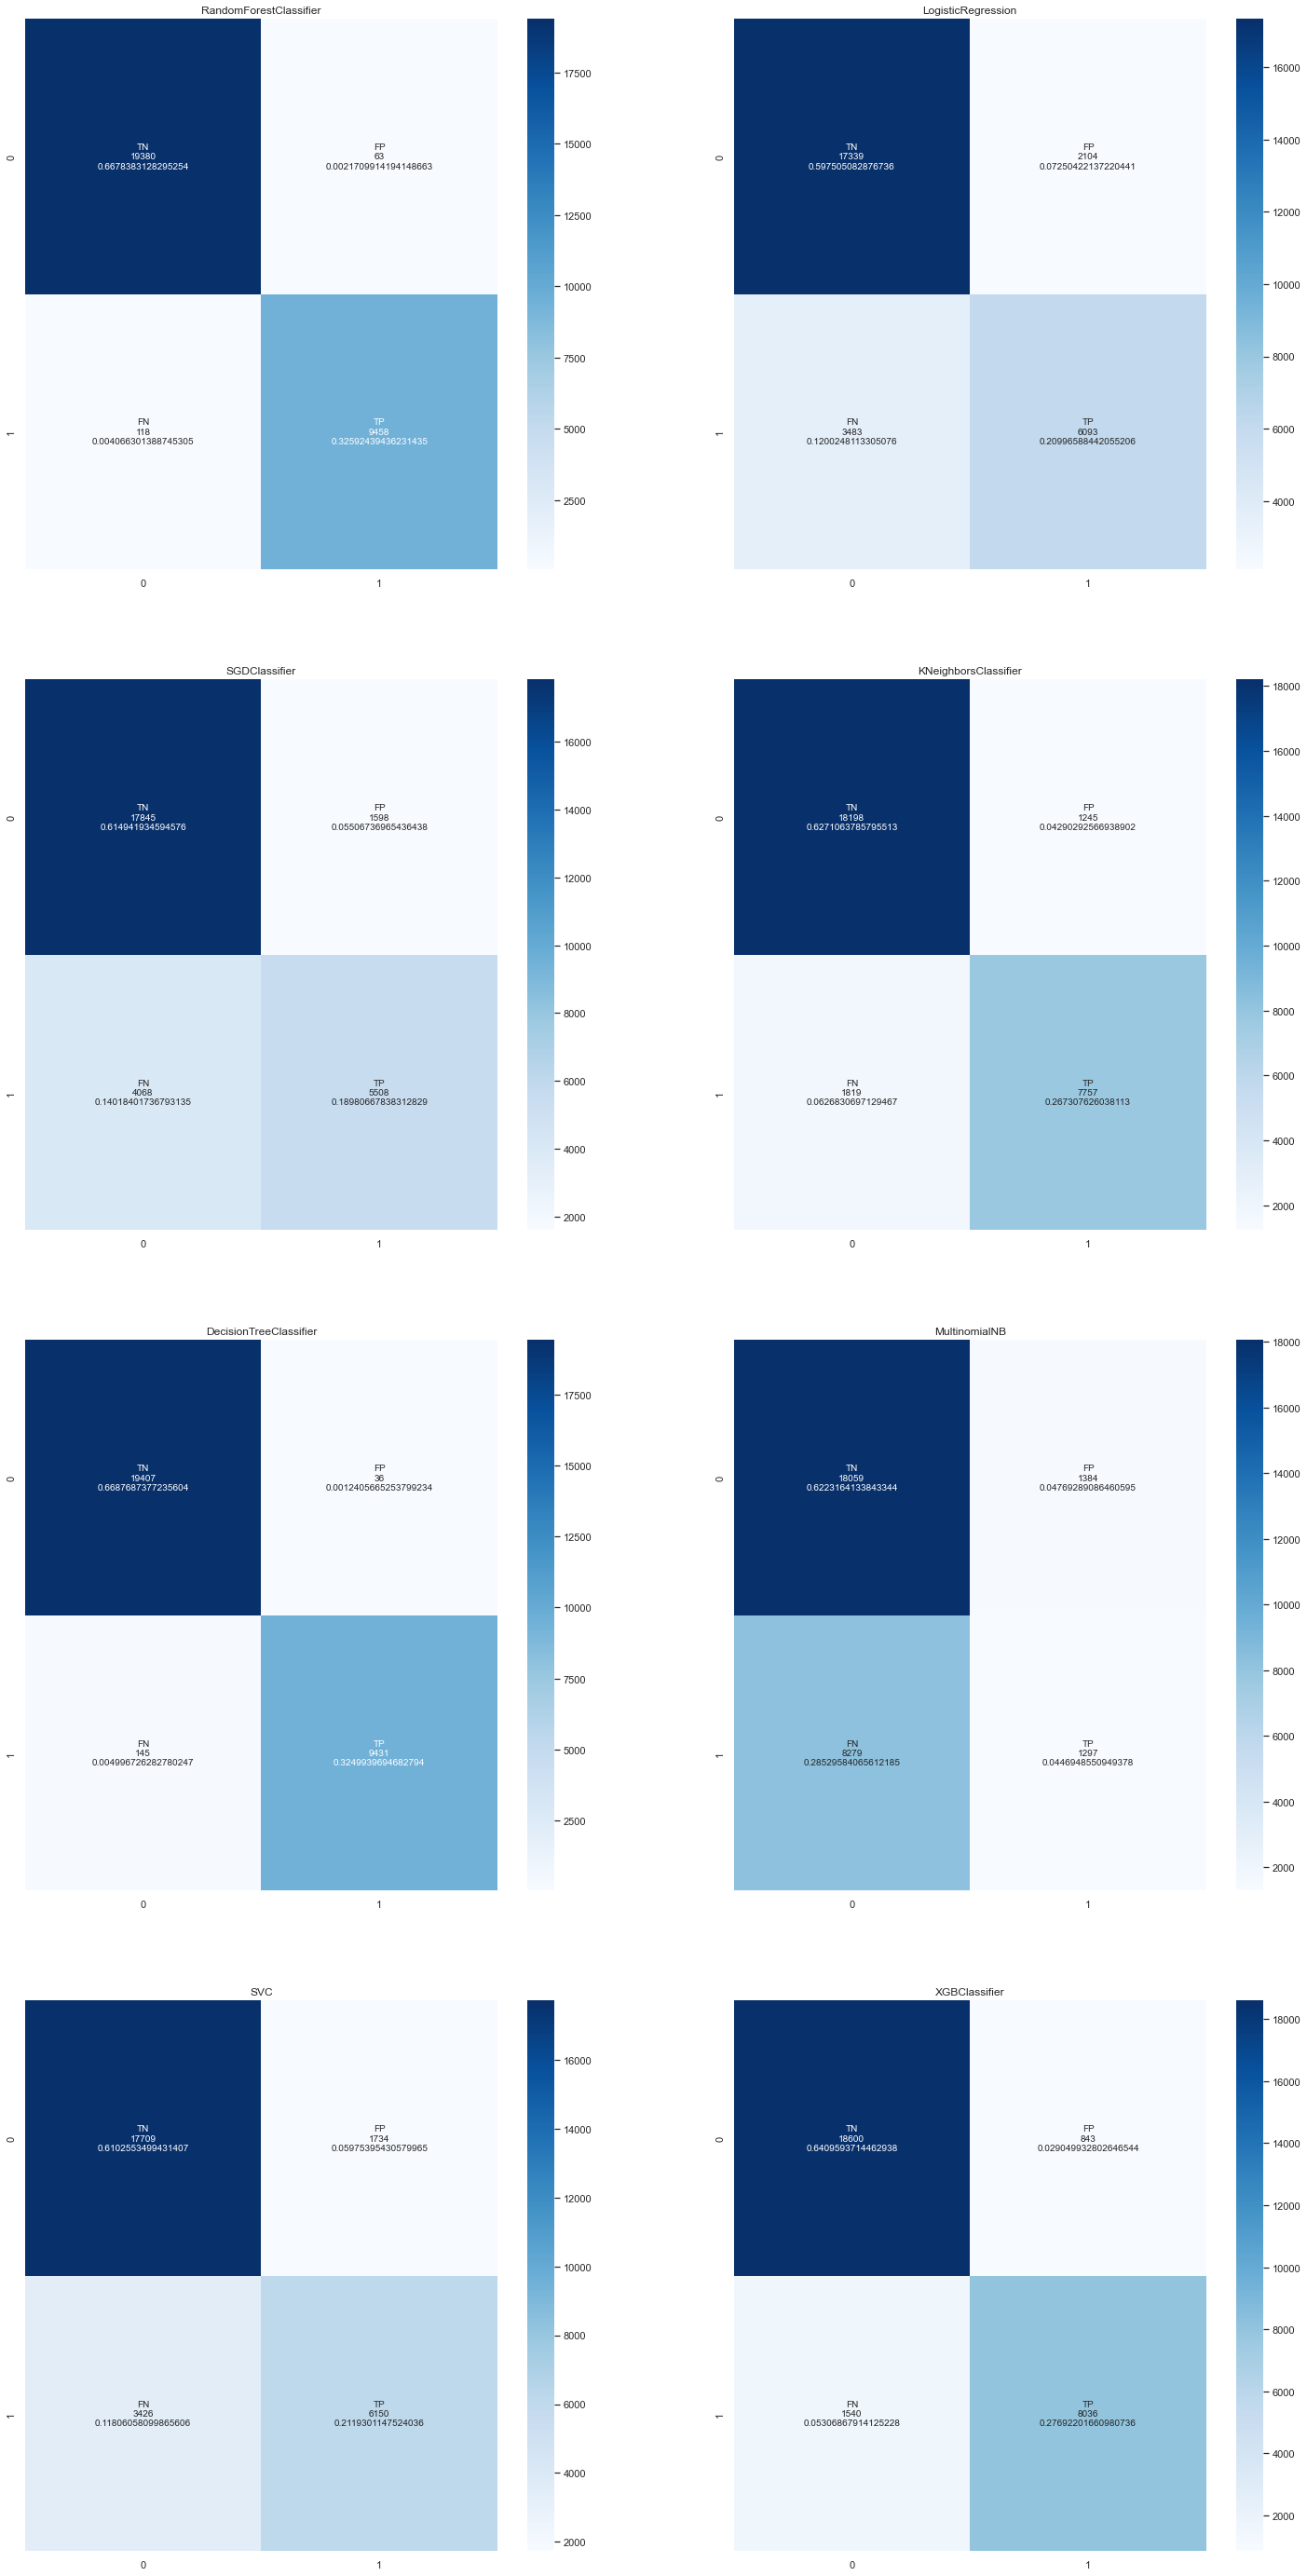

In [24]:
fig, ax = plt.subplots(4,2, figsize = (25, 50))

for model, ax in zip (model_clf, ax.flatten()):
    fitted_model = model.fit(X_train, y_train)
    y_pred = fitted_model.predict(X_train)
    conf_matrix = confusion_matrix(y_train, y_pred)
    
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{}'.format(value/conf_matrix.sum()) for value in conf_matrix.flatten()]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)
    ax.title.set_text(type(model).__name__)
    

Berdasarkan grafik didapati model Random Forest Classifier merupakan model dengan jumlah TP dan TN terbanyak dibandingkan dengan model lain. Berikut testing model RFC terhadap testing set.

In [25]:
model = clf_rfc
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print(f'TN : {tn}\nFP : {fp}\nFN : {fn}\nTP : {tp}')

TN : 4652
FP : 295
FN : 412
TP : 1896


### Modeling dengan Cross Validation
Setelah melakukan modeling menggunakan splitting data dengan cara biasa, berikut modeling dengan menggunakan cross validation.

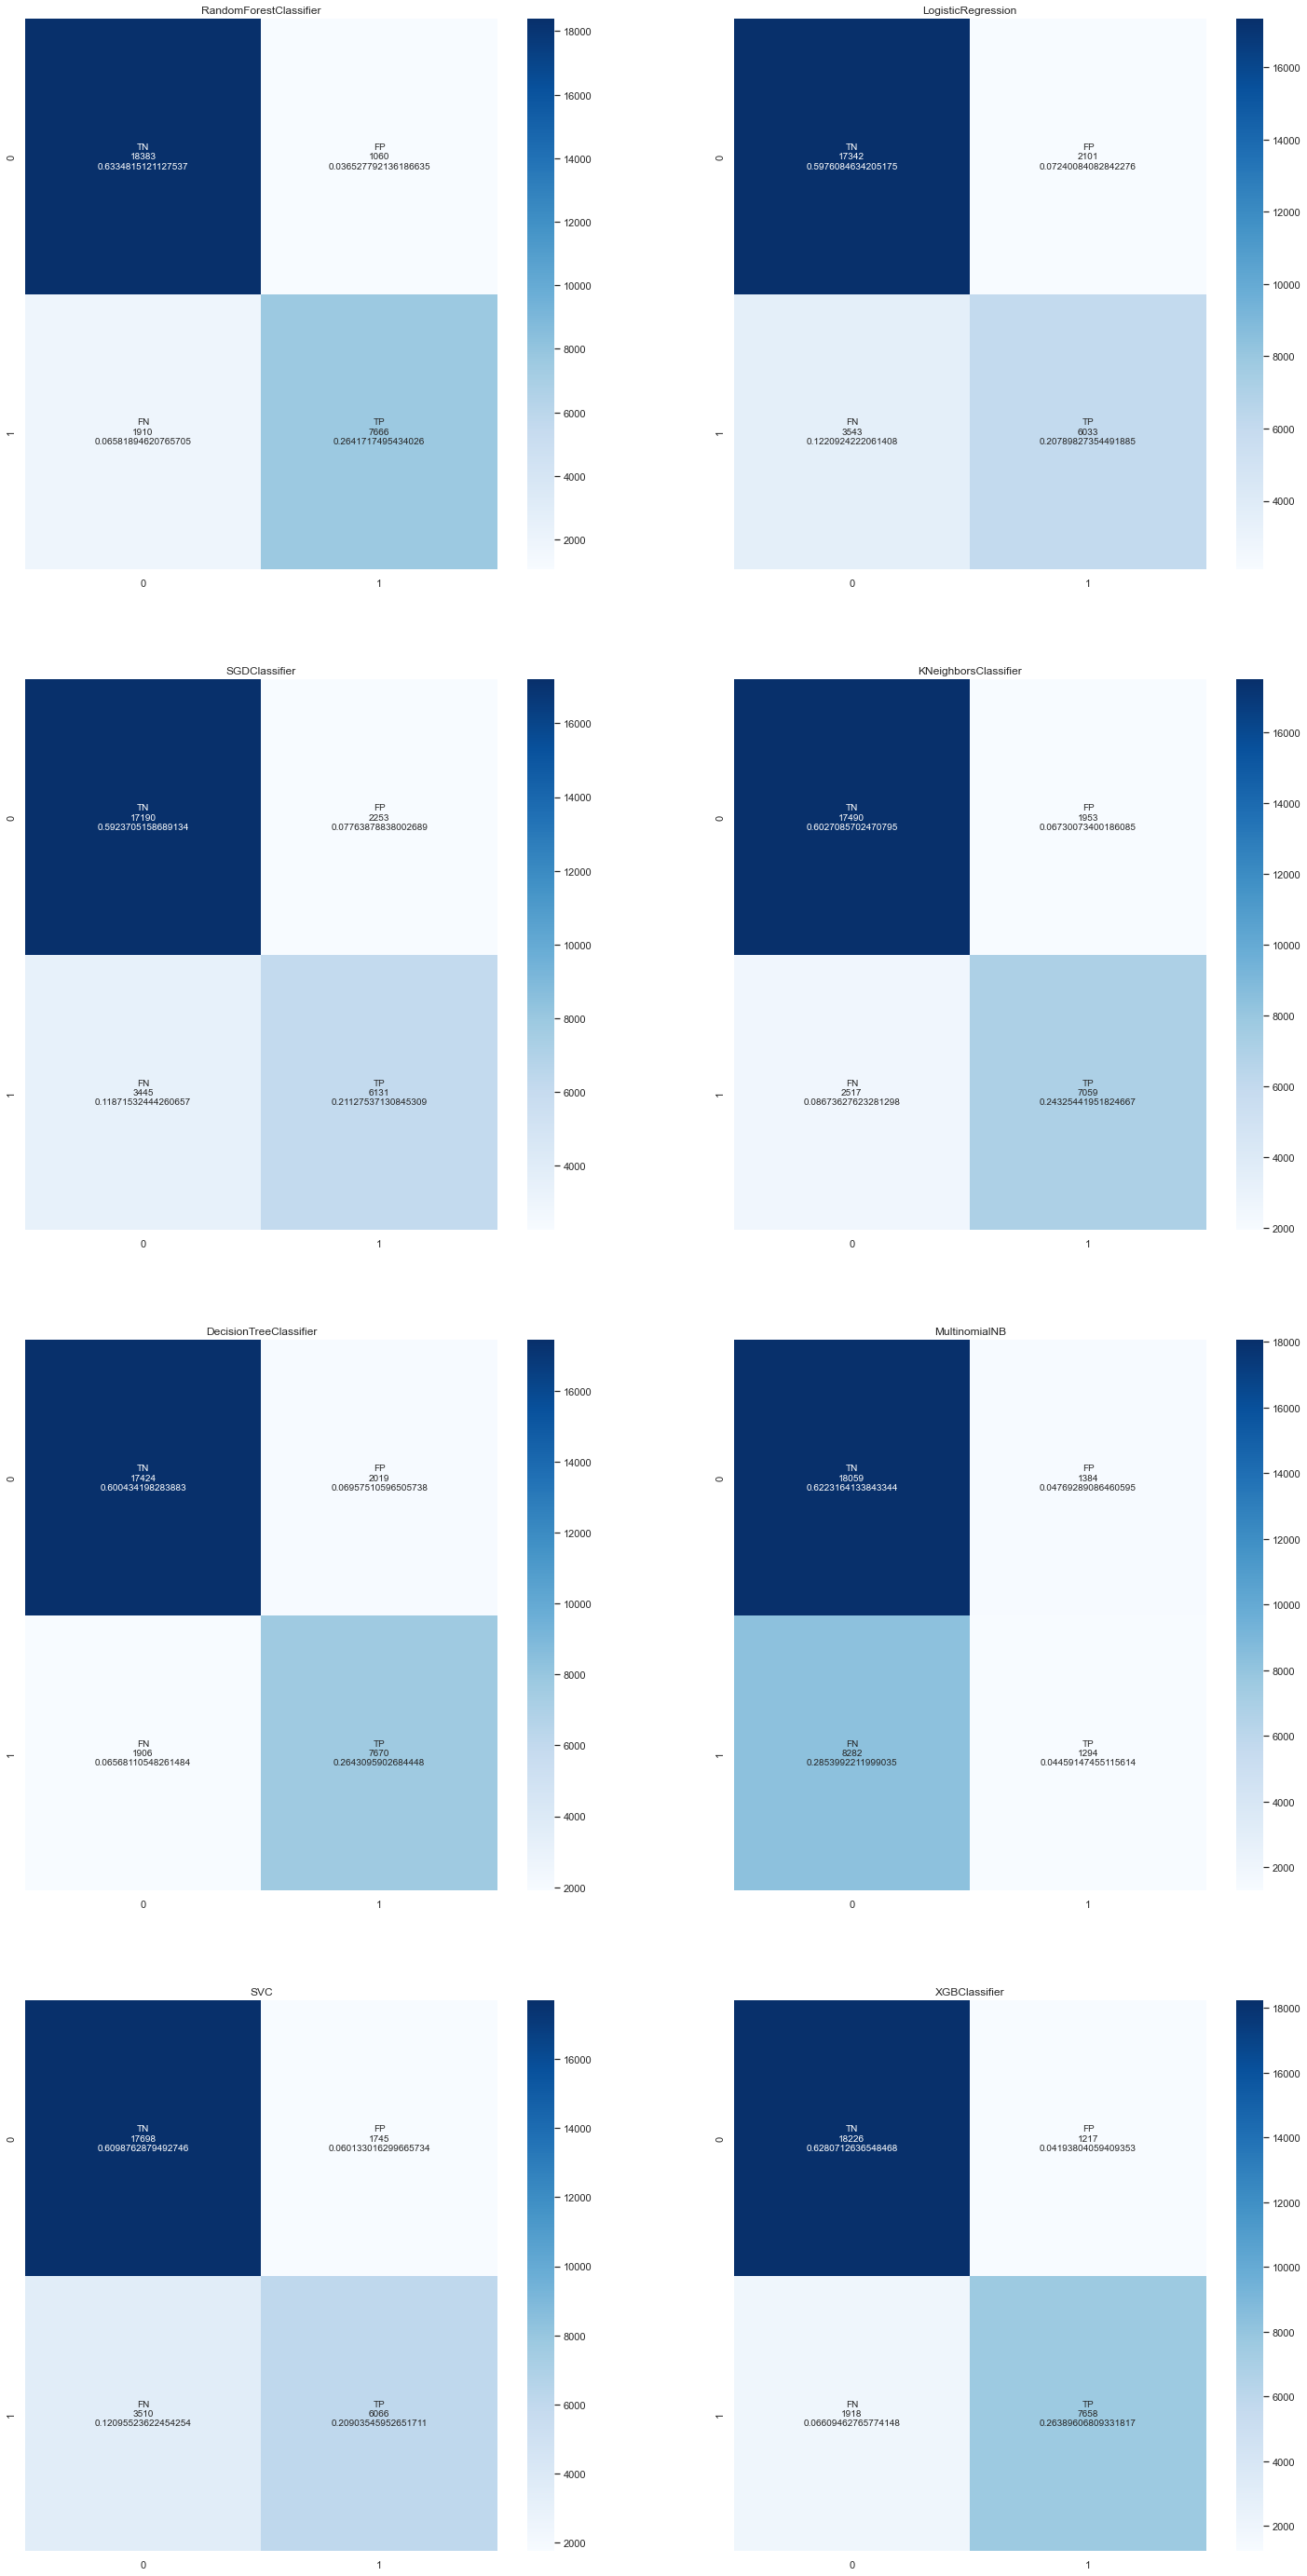

In [26]:
fig, ax = plt.subplots(4, 2, figsize = (25, 50))

for model, ax in zip (model_clf, ax.flatten()):
    kfold = KFold(random_state = 0, shuffle = True)
    y_train_pred = cross_val_predict(model, X_train, y_train, cv = kfold)
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{}'.format(value/conf_matrix.sum()) for value in conf_matrix.flatten()]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)
    ax.title.set_text(type(model).__name__)


In [32]:
# model_acc = []
# model_precision = []
# model_recall = []
# model_f1 = []
# names = []

# for model, name in zip(model_clf, model_name):
#     kfold = KFold(random_state = 0, shuffle = True)
#     cv_acc = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
#     cv_precision = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'precision')
#     cv_recall = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'recall')
#     cv_f1score = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1')
    
#     model_acc.append(cv_acc.mean())
#     model_precision.append(cv_precision.mean())
#     model_recall.append(cv_recall.mean())
#     model_f1.append(cv_f1score.mean())
    
#     names.append(name)
    
# model_metrics = {
#     'Accuracy' : model_acc,
#     'Precision' : model_precision,
#     'Recall' : model_recall,
#     'F1' : model_f1
# }

# model_metrics = pd.DataFrame(model_metrics, index = names)

# model_metrics.to_csv('ModelMetrics.csv')

model_metrics = pd.read_csv(os.path.join(path, 'ModelMetrics.csv'))
model_metrics = model_metrics.rename({'Unnamed: 0' : 'Model Names'}, axis = 'columns')

model_metrics   

,Model Names,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.898346,0.880387,0.798722,0.838171
1,LogisticRegression,0.804583,0.740314,0.624583,0.677461
2,SGDClassifier,0.801585,0.747627,0.607903,0.666268
3,KNeighborsClassifier,0.846554,0.785247,0.733813,0.758618
4,DecisionTreeClassifier,0.862681,0.788076,0.796392,0.792139
5,MultinomialNB,0.668470,0.484279,0.136136,0.212505
6,SVC,0.818711,0.775804,0.630687,0.695673
7,XGBClassifier,0.891558,0.861512,0.798504,0.828752


In [28]:
fix_model = clf_rfc

y_test_pred_cv = cross_val_predict(fix_model, X_test, y_test)
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_test_pred_cv).ravel()

acc_test = cross_validate(fix_model, X_test, y_test, scoring = ['accuracy', 'precision', 'recall', 'f1'])
print(f'TN : {tn2}\nFP : {fp2}\nFN : {fn2}\nTP : {tp2}')

TN : 4662
FP : 285
FN : 612
TP : 1696


In [29]:
acc_test

{'fit_time': array([0.61329484, 0.59720707, 0.61768436, 0.60004592, 0.78308368]),
 'score_time': array([0.0400033 , 0.04100275, 0.03800321, 0.03800297, 0.06100392]),
 'test_accuracy': array([0.8800827 , 0.8731909 , 0.87112336, 0.88283942, 0.869745  ]),
 'test_precision': array([0.84914842, 0.84367246, 0.84987277, 0.85784314, 0.84556962]),
 'test_recall': array([0.75704989, 0.73752711, 0.72294372, 0.75757576, 0.72294372]),
 'test_f1': array([0.80045872, 0.78703704, 0.78128655, 0.8045977 , 0.77946324])}

In [30]:
test = pd.DataFrame(acc_test)

for i in test:
    test[i] = test[i].mean()
    
test.drop_duplicates()
test2 = test.iloc[0]
test2

fit_time          0.642263
score_time        0.043603
test_accuracy     0.875396
test_precision    0.849221
test_recall       0.739608
test_f1           0.790569
Name: 0, dtype: float64

In [31]:
conf_matrix_compared = {
    'TN' : [tn, tn2, tn-tn2],
    'FP' : [fp, fp2, fp-fp2],
    'FN' : [fn, fn2, fn-fn2],
    'TP' : [tp, tp2, tp-tp2]
}

idx = ['not_cv','cv', 'not_cv - cv']

conf_matrix_compared = pd.DataFrame(conf_matrix_compared, index = idx)
conf_matrix_compared

,TN,FP,FN,TP
not_cv,4652,295,412,1896
cv,4662,285,612,1696
not_cv - cv,-10,10,-200,200


Berdasarkan hasil dari perbandingan model dengan cross validation dan splitting data biasa, terdapat selisih yang signifikan dimana model tanpa cv memberikan performa yang lebih baik. Hal ini tentunya memberikan kejutan. Akan tetapi, mungkin hal ini juga dipengaruhi oleh kemungkinan overfittingnya model terhadap training set. Hal ini akan benar benar berdampak terhadap data yang berjumlah besar. Dimana kemungkinan model dengan cv akan memberikan performa yang lebih stabil dibandingkan dengan model tanpa cv (hipotesis).

Perlu diperhatikan bahwa pada projek ini kita melatih model kita menggunakan dataset dengan label yang tidak seimbang, sehingga mungkin model juga tidak bekerja dengan baik(1). Juga, mengingat tujuan utama kita adalah membantu hotel mencari pelanggan yang memungkinkan membatalkan reservasi, maka false positive harus kita tekankan. Hal ini berguna untuk meminimalisir salahnya pengambilan keputusan dan menyebabkan kekecewaan pelanggan (2). Dengan skor specificity yang cuman 81% berarti kinerja model perlu ditingkatkan kembali (3).

Note untuk besok adalah memperbaiki projek dengan menerapkan cross validation system, juga jangan dilupakan faktor fitur / kolom sensitif yang perlu dipertimbangkan kembali.